In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras

In [2]:
df = pd.read_csv("creditcard.csv")
#Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have
#not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between
#each transaction and the first transaction in the dataset.

In [3]:
df.rename(columns = {'Class':'isFraud'}, inplace = True) 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,isFraud
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df['isFraud'].value_counts()

0    284315
1       492
Name: isFraud, dtype: int64

(array([2.62369e+05, 1.31640e+04, 4.02500e+03, 1.96100e+03, 9.64000e+02,
        5.68000e+02, 3.64000e+02, 2.62000e+02, 1.23000e+02, 1.03000e+02,
        8.50000e+01, 5.90000e+01, 4.50000e+01, 4.70000e+01, 3.80000e+01,
        3.10000e+01, 2.20000e+01, 1.10000e+01, 1.40000e+01, 8.00000e+00,
        7.00000e+00, 3.00000e+00, 6.00000e+00, 5.00000e+00, 1.00000e+00,
        4.00000e+00, 2.00000e+00, 3.00000e+00, 2.00000e+00, 3.00000e+00,
        4.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

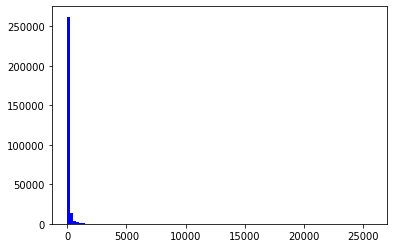

In [5]:
import matplotlib.pyplot as plt
plt.hist(df[df.isFraud == False]['Amount'], color='b', label='Real', bins=100)

(array([230.,  27.,  14.,   5.,  12.,   8.,   9.,   4.,   5.,   2.,   3.,
          6.,   3.,   5.,  38.,   7.,   3.,   5.,   3.,   1.,   3.,   1.,
          1.,   0.,   4.,   2.,   5.,   1.,   1.,   2.,   0.,   1.,   1.,
          4.,   2.,   3.,   2.,   0.,   3.,   0.,   1.,   2.,   0.,   2.,
          4.,   5.,   0.,   1.,   2.,   1.,   3.,   2.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,   2.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
          0.,   2.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   3.,   3.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,
          0.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

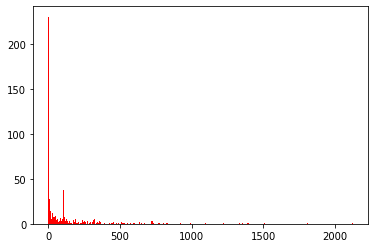

In [6]:
plt.hist(df[df.isFraud == True]['Amount'], color='r', label='Fraud', bins=300)

##### clean data.

In [7]:
def norm(data):
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

In [8]:
from sklearn.model_selection  import train_test_split
X, y = df.iloc[:,:-1], df.iloc[:, -1]
y = keras.utils.to_categorical(y, num_classes=1)

X_orig = X
X = norm(X) #normalize the data to N(0,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

##### build keras neural network models [BE MORE SPECIFIC! ]

In [14]:
from tensorflow.keras.models import Sequential
import tensorflow as tf

mod_focal = Sequential()

from tensorflow.keras.layers import Dense

input_dim = X_train.shape[1]
nb_classes = y_train.shape[1]

mod_focal.add(Dense(10, input_dim=input_dim, activation='relu', name='input'))
mod_focal.add(Dense(20, activation='relu', name='fc1'))
mod_focal.add(Dense(10, activation='relu', name='fc2'))
mod_focal.add(Dense(nb_classes, activation='softmax', name='output'))

In [27]:
mod_ce_acc = tf.keras.models.clone_model(mod_focal)
mod_ce_rec = tf.keras.models.clone_model(mod_focal)     
mod_ce_bal_weight = tf.keras.models.clone_model(mod_focal)
mod_ce_bal= tf.keras.models.clone_model(mod_focal)
mod_dectree = tf.keras.models.clone_model(mod_focal)
mod_unequal = tf.keras.models.clone_model(mod_focal)


In [28]:
# focal loss method, source: https://github.com/Tony607/Focal_Loss_Keras

class FocalLoss(keras.losses.Loss):
    def __init__(self, gamma=2., alpha=4.,
                 reduction=keras.losses.Reduction.AUTO, name='focal_loss'):
        """Focal loss for multi-classification
        FL(p_t)=-alpha(1-p_t)^{gamma}ln(p_t)
        Notice: y_pred is probability after softmax
        gradient is d(Fl)/d(p_t) not d(Fl)/d(x) as described in paper
        d(Fl)/d(p_t) * [p_t(1-p_t)] = d(Fl)/d(x)
        Focal Loss for Dense Object Detection
        https://arxiv.org/abs/1708.02002

        Keyword Arguments:
            gamma {float} -- (default: {2.0})
            alpha {float} -- (default: {4.0})
        """
        super(FocalLoss, self).__init__(reduction=reduction,
                                        name=name)
        self.gamma = float(gamma)
        self.alpha = float(alpha)

    def call(self, y_true, y_pred):
        """
        Arguments:
            y_true {tensor} -- ground truth labels, shape of [batch_size, num_cls]
            y_pred {tensor} -- model's output, shape of [batch_size, num_cls]

        Returns:
            [tensor] -- loss.
        """
        epsilon = 1.e-9
        y_true = tf.convert_to_tensor(y_true, tf.float32)
        y_pred = tf.convert_to_tensor(y_pred, tf.float32)

        model_out = tf.add(y_pred, epsilon)
        ce = tf.multiply(y_true, -tf.math.log(model_out))
        weight = tf.multiply(y_true, tf.pow(
            tf.subtract(1., model_out), self.gamma))
        fl = tf.multiply(self.alpha, tf.multiply(weight, ce))
        reduced_fl = tf.reduce_max(fl, axis=1)
        return tf.reduce_mean(reduced_fl)


In [ ]:
#asymmetric loss
#https://github.com/keras-team/keras/issues/2115
import tensorflow.keras.backend as K
from tensorflow.keras.losses import CategoricalCrossentropy


class WeightedCategoricalCrossentropy(CategoricalCrossentropy):
    
    def __init__(self, cost_mat, name='weighted_categorical_crossentropy', **kwargs):
        assert cost_mat.ndim == 2
        assert cost_mat.shape[0] == cost_mat.shape[1]
        
        super().__init__(name=name, **kwargs)
        self.cost_mat = K.cast_to_floatx(cost_mat)
    
    def __call__(self, y_true, y_pred, sample_weight=None):
        assert sample_weight is None, "should only be derived from the cost matrix"
      
        return super().__call__(
            y_true=y_true,
            y_pred=y_pred,
            sample_weight=get_sample_weights(y_true, y_pred, self.cost_mat),
        )


def get_sample_weights(y_true, y_pred, cost_m):
    num_classes = len(cost_m)

    y_pred.shape.assert_has_rank(2)
    y_pred.shape[1:].assert_is_compatible_with(num_classes)
    y_pred.shape.assert_is_compatible_with(y_true.shape)

    y_pred = K.one_hot(K.argmax(y_pred), num_classes)

    y_true_nk1 = K.expand_dims(y_true, 2)
    y_pred_n1k = K.expand_dims(y_pred, 1)
    cost_m_1kk = K.expand_dims(cost_m, 0)

    sample_weights_nkk = cost_m_1kk * y_true_nk1 * y_pred_n1k
    sample_weights_n = K.sum(sample_weights_nkk, axis=[1, 2])

    return sample_weights_n

In [ ]:
#asymmetric loss
#https://github.com/keras-team/keras/issues/2115
#
#from keras.losses import CategoricalCrossentropy
#from tensorflow.python.keras.utils import losses_utils
#from itertools import product
#
## w_array[i, j] defines the weight for an example of class i falsely classified as class j.
#def get_sample_weights(y_true, y_pred, cost_m):
#    num_classes = len(cost_m)
#
#    cost_m = K.cast(cost_m, 'float32')
#    y_pred.shape.assert_has_rank(2)
#    assert(y_pred.shape[1] == num_classes)
#    y_pred.shape.assert_is_compatible_with(y_true.shape)
#
#    y_pred = K.one_hot(K.argmax(y_pred), num_classes)
#
#    y_true_nk1 = K.expand_dims(y_true, 2)
#    y_pred_n1k = K.expand_dims(y_pred, 1)
#    cost_m_1kk = K.expand_dims(cost_m, 0)
#
#    sample_weights_nkk = cost_m_1kk * y_true_nk1 * y_pred_n1k
#    sample_weights_n = K.sum(sample_weights_nkk, axis=[1, 2])
#
#    return sample_weights_n
#
#
#class weighted_categorical_crossentropy(tf.keras.losses.CategoricalCrossentropy):
#    
#  def __init__(
#      self,
#      *,
#      weights,
#      from_logits=False,
#      label_smoothing=0,
#      reduction=losses_utils.ReductionV2.SUM_OVER_BATCH_SIZE,
#      name='categorical_crossentropy',
#  ):
#
#      super().__init__(
#          from_logits, label_smoothing, reduction, name=f"weighted_{name}"
#      )
#      self.weights = weights
#
#  def call(self, y_true, y_pred):
#     return super().call(y_true, y_pred) * get_sample_weights(y_true, y_pred, self.weights)
#
#  def get_config(self):
#    return {'weights': self.weights}
#
#  @classmethod
#  def from_config(cls, config):
#    return cls(**config)


In [57]:
#compile the models

mod_focal.compile(loss=FocalLoss(alpha=1),
              optimizer='sgd',
              metrics=['accuracy'])

#model.compile(loss=WeightedCategoricalCrossentropy(cost_matrix), ...) #weighted model.

mod_ce_acc.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

mod_ce_rec.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [62]:
#weight misclassification of fraud higher.
w_array = np.ones((2,2))
w_array[1,0] = 4


mod_ce_bal_weight.compile(loss=WeightedCategoricalCrossentropy(w_array),
              optimizer='sgd',
              metrics=['accuracy'])

##### train our models

In [35]:
mod_focal.summary()
mod_focal.fit(X_train, y_train, epochs=3, batch_size=1000) #fit model


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 10)                310       
_________________________________________________________________
fc1 (Dense)                  (None, 20)                220       
_________________________________________________________________
fc2 (Dense)                  (None, 10)                210       
_________________________________________________________________
output (Dense)               (None, 2)                 22        
Total params: 762
Trainable params: 762
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
228/228 [==============================] - 1s 2ms/step - loss: 0.0431 - accuracy: 0.9811
Epoch 2/3
228/228 [==============================] - 1s 3ms/step - loss: 0.0150 - accuracy: 0.9982
Epoch 3/3
228/228 [==============================] - 1s 

In [58]:
#define our universal fitting params

nb_batch = 1000
nb_epoch = 3



In [64]:
mod_ce_acc.fit(X_train, y_train, epochs=3, batch_size=nb_batch)


Epoch 1/3
228/228 [==============================] - 1s 3ms/step - loss: 0.1597 - accuracy: 0.9922
Epoch 2/3
228/228 [==============================] - 1s 3ms/step - loss: 0.0388 - accuracy: 0.9982
Epoch 3/3
228/228 [==============================] - 1s 4ms/step - loss: 0.0267 - accuracy: 0.9982


In [65]:
mod_ce_rec.fit(X_train, y_train, epochs=nb_epoch, batch_size=nb_batch)

Epoch 1/3
228/228 [==============================] - 1s 4ms/step - loss: 0.2426 - accuracy: 0.9975
Epoch 2/3
228/228 [==============================] - 1s 4ms/step - loss: 0.0436 - accuracy: 0.9982
Epoch 3/3
228/228 [==============================] - 1s 3ms/step - loss: 0.0239 - accuracy: 0.9982


In [63]:


mod_ce_bal_weight.fit(X_train, y_train, epochs=nb_epoch, batch_size=nb_batch)

#mod_ce_bal_weight.fit(X_train, y_train, epochs=3, batch_size=1000,
#                      sample_weight = ((X_train['Amount'] - min(X_train['Amount'])/max(X_train['Amount'])) ))

Epoch 1/3
228/228 [==============================] - 0s 2ms/step - loss: 0.3567 - accuracy: 0.9286
Epoch 2/3
228/228 [==============================] - 1s 3ms/step - loss: 0.1105 - accuracy: 0.9982
Epoch 3/3
228/228 [==============================] - 0s 2ms/step - loss: 0.0638 - accuracy: 0.9983


##### evaluate our models.

In [ ]:
score = mod_focal.evaluate(X_test, y_test, batch_size=1000) #evaluate fit using ??? method.

In [ ]:
# TO DO: instead of confusion matrix, use the ML things they tend to use: accuracy, and th eother two.

In [ ]:
%matplotlib inline
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
predictions = mod_focal.predict(X_test, batch_size=1000)

LABELS = ['Real','Fraud'] 

max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)

plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", annot_kws={"size": 20});
plt.title("Confusion matrix", fontsize=20)
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.show()

In [ ]:
values = confusion_matrix.view()
error_count = values.sum() - np.trace(values)
error_count

#### new metric: amount of money lost by company due to fraud. (assuming they reimburse all fraud cases)

In [ ]:
#number of fraud cases categorizes as real -> get the amount of money
X_temp = X_orig.iloc[X_test.index]['Amount']
total_monetary_loss = sum(X_temp[(max_test != max_predictions) & (max_test == 1)])
print("total monetary loss: " + str(total_monetary_loss))

array([[1., 1.],
       [1., 1.]])